In [68]:
import pandas as pd
import matplotlib.pyplot as plt 

In [11]:
# Import data 'AllMoviesDetailsCleaned'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = 'AllMoviesDetailsCleaned.csv'
data_cleaned = pd.read_csv(f"{path}{file_name}", delimiter=';')
data_cleaned.head()

/tmp/ipykernel_15502/584763029.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv(f"{path}{file_name}", delimiter=';')


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [12]:
data_cleaned.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')

In [13]:
data_cleaned.shape

(329044, 22)

In [14]:
data_cleaned.duplicated().sum()

0

In [76]:
# Percentage of Null Value
data_cleaned.isnull().sum().sort_values(ascending=False)/len(data_cleaned)

tagline                        0.839137
genres                         0.369340
imdb_id                        0.238509
overview                       0.154946
runtime                        0.111815
release_date                   0.073078
spoken_languages               0.013554
status                         0.006042
original_language              0.000617
title                          0.000003
original_title                 0.000003
id                             0.000000
production_countries_number    0.000000
production_companies_number    0.000000
vote_count                     0.000000
vote_average                   0.000000
revenue                        0.000000
budget                         0.000000
production_countries           0.000000
production_companies           0.000000
popularity                     0.000000
spoken_languages_number        0.000000
dtype: float64

In [93]:
data_cleaned.describe()

,id,budget,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
count,329044.000000,3.290440e+05,3.290440e+05,292252.000000,329044.000000,329044.000000,329044.00000,329044.000000,329044.000000
mean,252984.152937,6.129073e+05,1.533838e+06,60.406813,2.374474,14.211270,0.59475,0.609882,0.647628
std,138633.855160,6.845307e+06,2.401891e+07,142.502210,3.126254,166.443851,1.03807,0.664861,0.672048
min,2.000000,0.000000e+00,-1.200000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,124796.250000,0.000000e+00,0.000000e+00,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,276473.500000,0.000000e+00,0.000000e+00,71.000000,0.000000,0.000000,0.00000,1.000000,1.000000
75%,370839.250000,0.000000e+00,0.000000e+00,94.000000,5.500000,1.000000,1.00000,1.000000,1.000000
max,469219.000000,6.000000e+08,2.781506e+09,51420.000000,10.000000,12811.000000,26.00000,26.000000,25.000000


In [67]:
# Percentage of sample revnue is not equal 0
(data_cleaned['revenue']!=0).sum()/len(data_cleaned)

0.026409841844859654

In [69]:
# Percentage of sample budget is not equal 0
(data_cleaned['budget']!=0).sum()/len(data_cleaned)

0.047960151225975856

In [85]:
# Remove revenue with 0
data_cleaned_revenue = data_cleaned[data_cleaned['revenue']>0]
data_cleaned_revenue.shape

(8689, 22)

In [86]:
# Percentage of sample revnue is not equal 0
(data_cleaned_revenue['revenue']>0).sum()/len(data_cleaned_revenue)

1.0

In [92]:
data_cleaned_revenue['revenue'].sort_values(ascending=True)

117411             1
49545              1
15178              1
220549             1
227138             1
             ...    
87484     1513528810
14575     1519557910
474       1845034188
90013     2068223624
12167     2781505847
Name: revenue, Length: 8689, dtype: int64

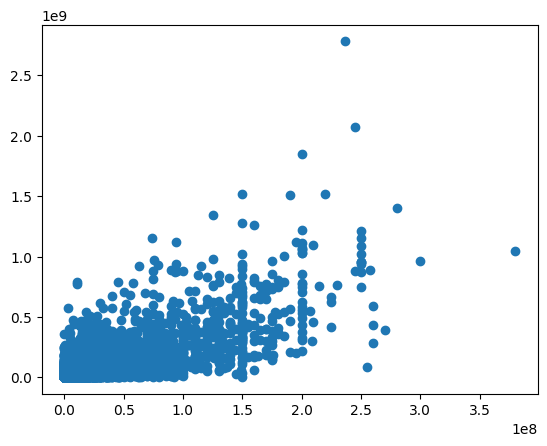

In [88]:
plt.scatter(data_cleaned_revenue['budget'],data_cleaned_revenue['revenue'])

In [16]:
# Import data 'AllMoviesCastingRaw.csv'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = 'AllMoviesCastingRaw.csv'
data_raw = pd.read_csv(f"{path}{file_name}", delimiter=';')
data_raw.head()

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny


In [17]:
data_raw.columns

Index(['id', 'actor1_name', 'actor1_gender', 'actor2_name', 'actor2_gender',
       'actor3_name', 'actor3_gender', 'actor4_name', 'actor4_gender',
       'actor5_name', 'actor5_gender', 'actor_number', 'director_name',
       'director_gender', 'director_number', 'producer_name',
       'producer_number', 'screeplay_name', 'editor_name'],
      dtype='object')

In [18]:
data_raw.isnull().sum()

id                 0
actor1_name        0
actor1_gender      0
actor2_name        0
actor2_gender      1
actor3_name        0
actor3_gender      0
actor4_name        0
actor4_gender      0
actor5_name        0
actor5_gender      0
actor_number       0
director_name      0
director_gender    1
director_number    0
producer_name      0
producer_number    0
screeplay_name     0
editor_name        0
dtype: int64

In [19]:
data_raw.shape

(329044, 19)

In [21]:
# Import data '220k_awards_by_directors'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = '220k_awards_by_directors.csv'
data_award = pd.read_csv(f"{path}{file_name}", delimiter=',')
data_award.head()

,director_name,ceremony,year,category,outcome,original_language
0,Aki Kaurismäki,ACCEC Awards,2004.0,ACCEC Award,Won,fi
1,Aki Kaurismäki,Alliance of Women Film Journalists,2012.0,EDA Award,Nominated,fi
2,Aki Kaurismäki,"Amanda Awards, Norway",1999.0,Amanda,Nominated,fi
3,Aki Kaurismäki,Argentinean Film Critics Association Awards,2013.0,Silver Condor,Nominated,fi
4,Aki Kaurismäki,Argentinean Film Critics Association Awards,2004.0,Silver Condor,Nominated,fi


In [22]:
data_award.columns

Index(['director_name', 'ceremony', 'year', 'category', 'outcome',
       'original_language'],
      dtype='object')

In [23]:
data_award.isnull().sum()

director_name        0
ceremony             0
year                 0
category             1
outcome              0
original_language    0
dtype: int64

In [24]:
data_award.shape

(225675, 6)

In [29]:
# Import data '500 favorite directors_with wikipedia summary'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = '500 favorite directors_with wikipedia summary.csv'
data_favorite = pd.read_csv(f"{path}{file_name}", delimiter=';')
data_favorite.head()

,Abdellatif Kechiche,"(french: [abdublatif keuiu]; tunisian arabic: uuuf uuuuuau uuuauue, born december ) is a tunisian-french actor, film director and screenwriter. he made his directorial debut in with la faute ue voltaire, which he also wrote. his film blue is the warmest colour won the palme d'or at the cannes film festival."
0,Abel Gance,(french: [guus]; october u november ) was...
1,Agnès Varda,agnues (french: [auubs vauda]; born may ) is...
2,Aki Kaurismäki,olavi kaurismueki (finnish: [ucuki uckuurismu...
3,Akira Kurosawa,"(ueduca ue, march , u september , ) was a j..."
4,Alain Cavalier,(french: [kavalje]; born september ) is a f...


In [30]:
data_favorite.shape

(588, 2)

In [31]:
data_favorite.columns

Index(['Abdellatif Kechiche', '  (french: [abdublatif keuiu]; tunisian arabic: uuuf uuuuuau uuuauue, born  december ) is a tunisian-french actor, film director and screenwriter. he made his directorial debut in  with la faute ue voltaire, which he also wrote. his film blue is the warmest colour won the palme d'or at the  cannes film festival.'], dtype='object')

In [32]:
data_award.isnull().sum()

director_name        0
ceremony             0
year                 0
category             1
outcome              0
original_language    0
dtype: int64

In [33]:
# Import data '900_acclaimed_directors_awards'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = '900_acclaimed_directors_awards.csv'
data_acclaimed = pd.read_csv(f"{path}{file_name}", delimiter=';')
data_acclaimed.head()


,name,tmdbID,imdbID,Total awards,Academy Fellowship,Academy Fellowship_won,Academy Fellowship_nominated,Gold Hugo,Gold Hugo_won,Gold Hugo_nominated,...,Orpheus Award_nominated,Arte France Cinéma Award,Arte France Cinéma Award_won,Arte France Cinéma Award_nominated,Citizens Award,Citizens Award_won,Citizens Award_nominated,Cowboy Award,Cowboy Award_won,Cowboy Award_nominated
0,Ingmar Bergman,6648,nm0000005,101,1,1,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
1,Marlon Brando,3084,nm0000008,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Federico Fellini,4415,nm0000019,90,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Alfred Hitchcock,2636,nm0000033,53,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buster Keaton,8635,nm0000036,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data_acclaimed.columns

Index(['name', 'tmdbID', 'imdbID', 'Total awards', 'Academy Fellowship',
       'Academy Fellowship_won', 'Academy Fellowship_nominated', 'Gold Hugo',
       'Gold Hugo_won', 'Gold Hugo_nominated',
       ...
       'Orpheus Award_nominated', 'Arte France Cinéma Award',
       'Arte France Cinéma Award_won', 'Arte France Cinéma Award_nominated',
       'Citizens Award', 'Citizens Award_won', 'Citizens Award_nominated',
       'Cowboy Award', 'Cowboy Award_won', 'Cowboy Award_nominated'],
      dtype='object', length=6676)

In [35]:
data_acclaimed.shape

(893, 6676)

In [36]:
data_award.isnull().sum()

director_name        0
ceremony             0
year                 0
category             1
outcome              0
original_language    0
dtype: int64

In [39]:
# Import data 'language to country'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = 'language to country.csv'
data_language = pd.read_csv(f"{path}{file_name}", delimiter=';')
data_language.head()

,Language,Country
0,fi,FIN
1,en,USA
2,de,GER
3,da,DNK
4,he,ISR


In [40]:
data_language.columns

Index(['Language', 'Country'], dtype='object')

In [41]:
data_language.shape

(93, 2)

In [42]:
data_language.isnull().sum()

Language    0
Country     0
dtype: int64

In [44]:
# Import data 'MostCommonLanguageByDirector'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = 'MostCommonLanguageByDirector.csv'
data_mostcommon = pd.read_csv(f"{path}{file_name}", delimiter=',')
data_mostcommon.head()

,director_name,original_language,nb
0,\tCheung Chi-Sing,en,4
1,\tRaymond Fung Sai-Hung,cn,1
2,\tHuang Jian-Zhong,zh,3
3,\tZhang Jing,zh,2
4,Faris Kermani,en,2


In [45]:
data_mostcommon.columns

Index(['director_name', 'original_language', 'nb'], dtype='object')

In [46]:
data_mostcommon.shape

(85881, 3)

In [47]:
data_mostcommon.isnull().sum()

director_name        0
original_language    0
nb                   0
dtype: int64

In [56]:
# Import data 'spielberg_awards'

path = '/home/abeljiang2/code/final_project/data-movie-revenue-prediction/data/'
file_name = 'spielberg_awards.csv'
data_spielberg = pd.read_csv(f"{path}{file_name}",encoding = "ISO-8859-1")
data_spielberg.head()

,Unnamed: 0,name,ceremony,year,category,outcome,simplified_outcome
0,1,steven spielberg,"Academy Awards, USA",2016,Oscar,Nominated,Nominated
1,2,steven spielberg,"Academy Awards, USA",2013,Oscar,Nominated,Nominated
2,3,steven spielberg,"Academy Awards, USA",2012,Oscar,Nominated,Nominated
3,4,steven spielberg,"Academy Awards, USA",2007,Oscar,Nominated,Nominated
4,5,steven spielberg,"Academy Awards, USA",2006,Oscar,Nominated,Nominated


In [57]:
data_spielberg.columns

Index(['Unnamed: 0', 'name', 'ceremony', 'year', 'category', 'outcome',
       'simplified_outcome'],
      dtype='object')

In [58]:
data_spielberg.shape

(331, 7)

In [59]:
data_spielberg.isnull().sum()

Unnamed: 0            0
name                  0
ceremony              0
year                  0
category              0
outcome               0
simplified_outcome    0
dtype: int64